# Imports

In [13]:
# General Imports
import numpy as np
import pandas as pd
import pickle
import os

# Fixing random state for reproducibility
np.random.seed(19680801)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dates
import datetime
from datetime import datetime
from datetime import timedelta

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [14]:
# Choix d'une palette de couleurs
sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Import des données

## Import

In [15]:
########## import des données ##########

# Chemin d'accès aux données
path = '' #-> en local

filepath = os.path.join(path, 'data/df')

with open(filepath, 'rb') as f:
    df_final = pickle.load(f)

df_final.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,review,distance,Nb_commandes,order_item_id,customer_city,customer_state,payment_type,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,product_category_Eletronique et Divertissement,"product_category_Fashion, Beauté & Santé",product_category_Maison & jardin,"product_category_Travail de bureau, Industry & Construction"
0,1.167257,0.647319,-0.733865,-0.365812,-0.143138,0.072079,-0.658141,-1.725903,0.205285,-0.322790,-0.512780,1.001188,1.086596,0.724822,-0.783157,-0.277944,1.443171,0,1,1,2017.0,7.0,2.0,19.0,14.0,0,0,1,0
1,0.957866,1.327616,1.127941,1.305305,-0.143138,0.072079,-0.377872,0.685295,-0.253485,1.630269,0.304691,-0.464521,0.375678,-0.786379,0.513163,-0.277944,-0.292940,0,1,1,2018.0,2.0,2.0,14.0,11.0,0,1,0,0
2,1.062562,-0.487068,-0.733865,-0.276487,-0.143138,0.859505,-0.230308,-2.529636,-0.272668,-1.216744,-1.169459,-0.201061,1.140727,0.724822,-1.090666,-0.277944,1.443171,0,0,1,2018.0,5.0,5.0,26.0,12.0,0,0,0,1
3,1.271953,-0.537336,-0.733865,-0.537018,-0.143138,-0.715348,-0.541615,0.685295,-0.208044,-0.451719,-0.215734,-0.712737,0.602305,-0.786379,-0.299902,-0.277944,-0.292940,0,0,1,2017.0,4.0,0.0,3.0,23.0,1,0,0,0
4,-0.821955,-0.590956,-0.113263,-0.443599,-0.143138,0.859505,0.126602,-0.118437,-0.243696,0.345692,-0.670216,0.588430,-0.191630,0.724822,0.208500,-0.277944,-0.292940,0,1,1,2018.0,6.0,0.0,11.0,13.0,1,0,0,0


In [16]:
df_final.shape

(86120, 29)

# Jeu de données réduit

## Choix variables

In [17]:
# Lister les colonnes du df
df_final.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'review', 'distance', 'Nb_commandes',
       'order_item_id', 'customer_city', 'customer_state', 'payment_type',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'product_category_Eletronique et Divertissement',
       'product_category_Fashion, Beauté & Santé',
       'product_category_Maison & jardin',
       'product_category_Travail de bureau, Industry & Construction'],
      dtype='object')

In [18]:
df_final.reset_index(drop = True, inplace = True)

In [19]:
# Reconstituer date d'achat
df_final['Date_achat'] = df_final.apply(lambda row: datetime.strptime(f"{int(row.purchase_year)}-{int(row.purchase_month)}-{int(row.purchase_day)}", '%Y-%m-%d'), axis = 1)
df_final['Date_achat']

0       2017-07-19
1       2018-02-14
2       2018-05-26
3       2017-04-03
4       2018-06-11
           ...    
86115   2018-01-26
86116   2017-06-04
86117   2018-04-13
86118   2018-07-22
86119   2018-03-28
Name: Date_achat, Length: 86120, dtype: datetime64[ns]

In [20]:
# Choix des variables :

df_reduit = df_final[[
    'product_weight_g',
    'payment_sequential',
    'payment_value',
    'review',
    'distance',
    'Nb_commandes',
    'order_item_id',
    'customer_city',
    'payment_type'
    ]]

In [21]:
df_reduit.columns

Index(['product_weight_g', 'payment_sequential', 'payment_value', 'review',
       'distance', 'Nb_commandes', 'order_item_id', 'customer_city',
       'payment_type'],
      dtype='object')

In [22]:
df_reduit.reset_index(drop = True, inplace = True)

In [23]:
df_reduit

,product_weight_g,payment_sequential,payment_value,review,distance,Nb_commandes,order_item_id,customer_city,payment_type
0,-0.365812,-0.143138,-0.658141,0.724822,-0.783157,-0.277944,1.443171,0,1
1,1.305305,-0.143138,-0.377872,-0.786379,0.513163,-0.277944,-0.292940,0,1
2,-0.276487,-0.143138,-0.230308,0.724822,-1.090666,-0.277944,1.443171,0,1
3,-0.537018,-0.143138,-0.541615,-0.786379,-0.299902,-0.277944,-0.292940,0,1
4,-0.443599,-0.143138,0.126602,0.724822,0.208500,-0.277944,-0.292940,0,1
...,...,...,...,...,...,...,...,...,...
86115,-0.592846,-0.143138,-0.651689,-0.786379,0.207159,-0.277944,-0.292940,0,1
86116,-0.555627,-0.143138,-0.144086,-0.786379,0.041557,-0.277944,-0.292940,0,1
86117,-0.564932,-0.143138,-0.660096,-0.786379,-1.115925,-0.277944,-0.292940,0,1
86118,-0.558977,-0.143138,-0.045401,0.724822,0.761126,-0.277944,-0.292940,0,1


## Kmeans

### Kmeans clustering

In [24]:
%%time

# Entrainer le modèle en utilisant les paramètres définis dans le notebook précédant
model = KMeans(
    n_clusters = 3,
    n_init = 10,
    max_iter = 100,
    init = 'k-means++',
    tol = 0.01,
    algorithm = 'auto',
    random_state = 0
    )

# Entrainer le modèle
model.fit(df_reduit)
model.predict(df_reduit)

CPU times: user 3.57 s, sys: 1.25 s, total: 4.82 s
Wall time: 811 ms


array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
# Créer une copie du df pour ajouter les clusters et observer leur comportement
df_clusters = df_reduit

labels = model.labels_
df_clusters['cluster_num'] = labels
df_clusters.head()

,product_weight_g,payment_sequential,payment_value,review,distance,Nb_commandes,order_item_id,customer_city,payment_type,cluster_num
0,-0.365812,-0.143138,-0.658141,0.724822,-0.783157,-0.277944,1.443171,0,1,0
1,1.305305,-0.143138,-0.377872,-0.786379,0.513163,-0.277944,-0.292940,0,1,2
2,-0.276487,-0.143138,-0.230308,0.724822,-1.090666,-0.277944,1.443171,0,1,0
3,-0.537018,-0.143138,-0.541615,-0.786379,-0.299902,-0.277944,-0.292940,0,1,0
4,-0.443599,-0.143138,0.126602,0.724822,0.208500,-0.277944,-0.292940,0,1,0


# ARI Score

In [26]:
# tester stabilité de la segmentation client dans le temps et voir à quel moment les clients changent de cluster
# pour ça, on réitère les étapes précedantes sur des périodes décalées dans le temps de 30j, 60j, 90j...

# The higher the ARI value, the closer the two clusterings are to each other. 
# It ranges from -1 to 1, where 1 indicates perfect agreement between the two clusterings, 
# 0 indicates a random agreement and -1 indicates that the two clusterings are completely different

In [27]:
df_clusters.columns

Index(['product_weight_g', 'payment_sequential', 'payment_value', 'review',
       'distance', 'Nb_commandes', 'order_item_id', 'customer_city',
       'payment_type', 'cluster_num'],
      dtype='object')

In [28]:
# concat avec date
df_ari = pd.concat([df_clusters, df_final['Date_achat']], axis = 1)
df_ari

,product_weight_g,payment_sequential,payment_value,review,distance,Nb_commandes,order_item_id,customer_city,payment_type,cluster_num,Date_achat
0,-0.365812,-0.143138,-0.658141,0.724822,-0.783157,-0.277944,1.443171,0,1,0,2017-07-19
1,1.305305,-0.143138,-0.377872,-0.786379,0.513163,-0.277944,-0.292940,0,1,2,2018-02-14
2,-0.276487,-0.143138,-0.230308,0.724822,-1.090666,-0.277944,1.443171,0,1,0,2018-05-26
3,-0.537018,-0.143138,-0.541615,-0.786379,-0.299902,-0.277944,-0.292940,0,1,0,2017-04-03
4,-0.443599,-0.143138,0.126602,0.724822,0.208500,-0.277944,-0.292940,0,1,0,2018-06-11
...,...,...,...,...,...,...,...,...,...,...,...
86115,-0.592846,-0.143138,-0.651689,-0.786379,0.207159,-0.277944,-0.292940,0,1,0,2018-01-26
86116,-0.555627,-0.143138,-0.144086,-0.786379,0.041557,-0.277944,-0.292940,0,1,0,2017-06-04
86117,-0.564932,-0.143138,-0.660096,-0.786379,-1.115925,-0.277944,-0.292940,0,1,0,2018-04-13
86118,-0.558977,-0.143138,-0.045401,0.724822,0.761126,-0.277944,-0.292940,0,1,0,2018-07-22


In [29]:
# order by date et reset index
df_ari.sort_values(['Date_achat'], inplace = True)
df_ari.reset_index(drop = True, inplace = True)
df_ari

,product_weight_g,payment_sequential,payment_value,review,distance,Nb_commandes,order_item_id,customer_city,payment_type,cluster_num,Date_achat
0,-0.481190,-0.143138,-0.661025,0.724822,0.472334,-0.277944,-0.292940,0,0,0,2016-10-03
1,2.719614,-0.143138,-0.651933,-0.786379,-0.662662,-0.277944,-0.292940,0,0,2,2016-10-03
2,0.039871,-0.143138,-0.401089,0.724822,0.502267,-0.277944,-0.292940,1,0,0,2016-10-03
3,-0.518408,-0.143138,-0.629889,0.724822,0.608347,-0.277944,-0.292940,0,1,0,2016-10-03
4,0.132918,-0.143138,-0.199759,0.724822,-0.672830,-0.277944,-0.292940,0,1,0,2016-10-03
...,...,...,...,...,...,...,...,...,...,...,...
86115,-0.537018,-0.143138,1.578389,-0.786379,-0.800389,-0.277944,-0.292940,0,1,0,2018-08-29
86116,-0.462580,-0.143138,-0.393855,-0.786379,-0.862510,-0.277944,-0.292940,0,1,0,2018-08-29
86117,-0.537018,-0.143138,1.578389,-0.786379,-0.800389,-0.277944,4.915393,0,1,0,2018-08-29
86118,-0.029355,-0.143138,-0.552515,0.724822,-0.251349,-0.277944,-0.292940,0,1,0,2018-08-29


In [30]:
# définir timedelta

# premier date dispo = 03/10/2016
# dernière date dispo = 29/08/2018

# quasiment 2ans de données
# timedelta = prendre 6 mois glissants ? 180j

# écart entre les dates et les lignes n'est pas constant donc passer automatiquement pas les dates

2017-04-01 00:00:00


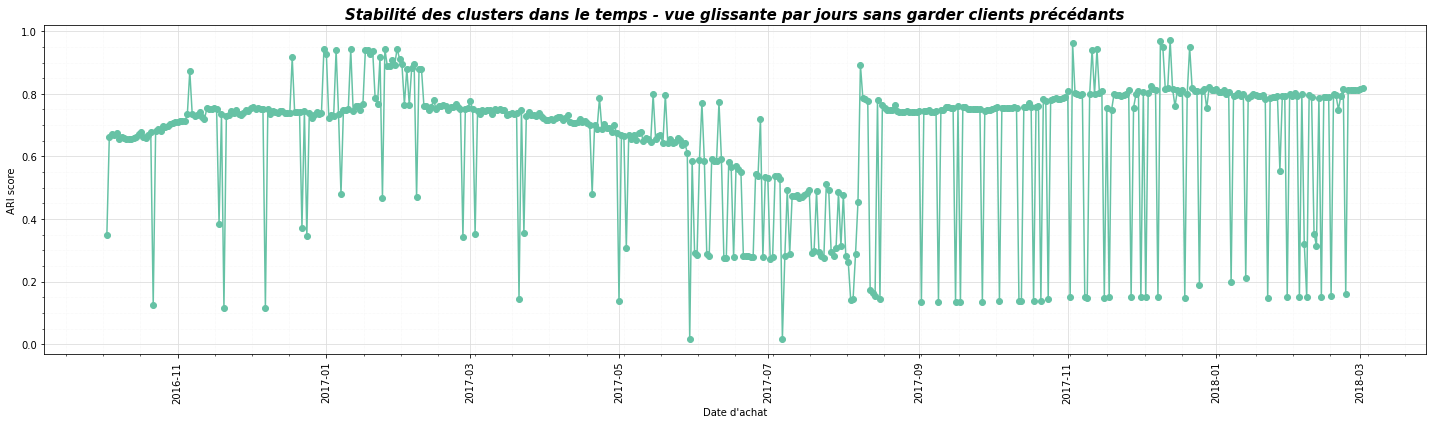

CPU times: user 33min 26s, sys: 6min 1s, total: 39min 28s
Wall time: 6min 50s


In [31]:
%%time

# ari score -> labels true vs labels pred

# dernière date dispo = 29/08/2018
last_day = pd.to_datetime('2018-08-29')

# intervalle de temps
date_debut = pd.to_datetime('2016-10-03')
date_fin = date_debut + pd.Timedelta(days = 180)
print(date_fin)

# liste vide pour stocker ari score et première date de chaque paquet de données
ari_values = []
date_achat = []

# avancer d'un jour dans le temps jusqu'à ce qu'on atteigne la dernière date du jeu de données
while date_fin <= last_day:
    date_achat.append(date_debut)

    # filtrer dates et prendre 6 mois de données
    #filter_date = (df_ari['Date_achat'] > date_debut) & (df_ari['Date_achat'] < date_fin) 
    #df_date = df_ari[filter_date].copy()
    df_date = df_ari.loc[(df_ari['Date_achat'] > date_debut) & (df_ari['Date_achat'] < date_fin)]

    # 'stocker' labels des clusters (pour ensuite comparer aux labels qu'on va prédire)
    labels_true = df_date['cluster_num']

    # copier le jeu de données sans prendre le nombre de clusters ni la date
    #data_cluster = df_date[['Count', 'order_item_id', 'product_description_lenght', 'product_weight_g',
    #   'payment_sequential', 'payment_installments', 'payment_value', 'review']].copy()

    data_cluster = df_date.drop(['Date_achat', 'cluster_num'], axis = 1)

    # kmeans
    km = KMeans(n_clusters = 3)
    km.fit(data_cluster)

    # prédire clusters
    labels_pred = km.predict(data_cluster)

    # calcul ari score
    ari = adjusted_rand_score(labels_true, labels_pred)
    ari_values.append(ari)

    # incrément d'un jour
    date_debut += timedelta(days = 1)
    date_fin += timedelta(days = 1)

# Figure résultat
plt.figure(figsize = (20, 6))
plt.plot(date_achat, ari_values, marker = 'o', linestyle = '-')
plt.title('Stabilité des clusters dans le temps - vue glissante par jours sans garder clients précédants', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel("Date d'achat")
plt.ylabel('ARI score')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

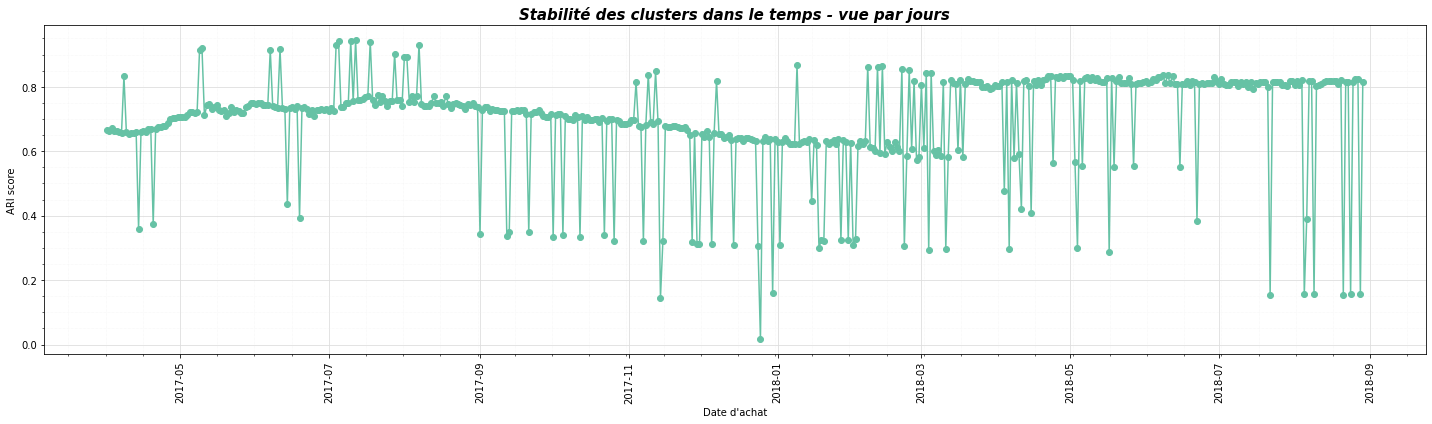

CPU times: user 1h 6min 51s, sys: 7min 4s, total: 1h 13min 55s
Wall time: 29min 50s


In [33]:
%%time

# Même chose en comparant avec t0

# dernière date dispo = 29/08/2018
last_day = pd.to_datetime('2018-08-29')

# intervalle de temps
date_debut = pd.to_datetime('2016-10-03')
date_fin = date_debut + pd.Timedelta(days = 180)

# liste vide pour stocker ari score
ari_values = []
date_achat = []

while date_fin <= last_day:
    date_achat.append(date_fin)

    # filtrer dates et prendre 6 mois de données
    filter_date = (df_ari['Date_achat'] < date_fin) 
    df_date = df_ari[filter_date].copy()

    # 'stocker' labels des clusters (pour ensuite comparer aux labels qu'on va prédire)
    labels_true = df_date['cluster_num']

    data_cluster = df_date.drop(['Date_achat', 'cluster_num'], axis = 1)
    
    # kmeans
    km = KMeans(n_clusters = 3)
    km.fit(data_cluster)

    # prédire clusters
    labels_pred = km.predict(data_cluster)

    # calcul ari score
    ari = adjusted_rand_score(labels_true, labels_pred)
    ari_values.append(ari)

    # incrément d'un jour (pour la date de fin seulement)
    date_debut += timedelta(days = 1)
    date_fin += timedelta(days = 1)

plt.figure(figsize = (20, 6))
plt.plot(date_achat, ari_values, marker = 'o', linestyle = '-')
plt.title('Stabilité des clusters dans le temps - vue par jours', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel("Date d'achat")
plt.ylabel('ARI score')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

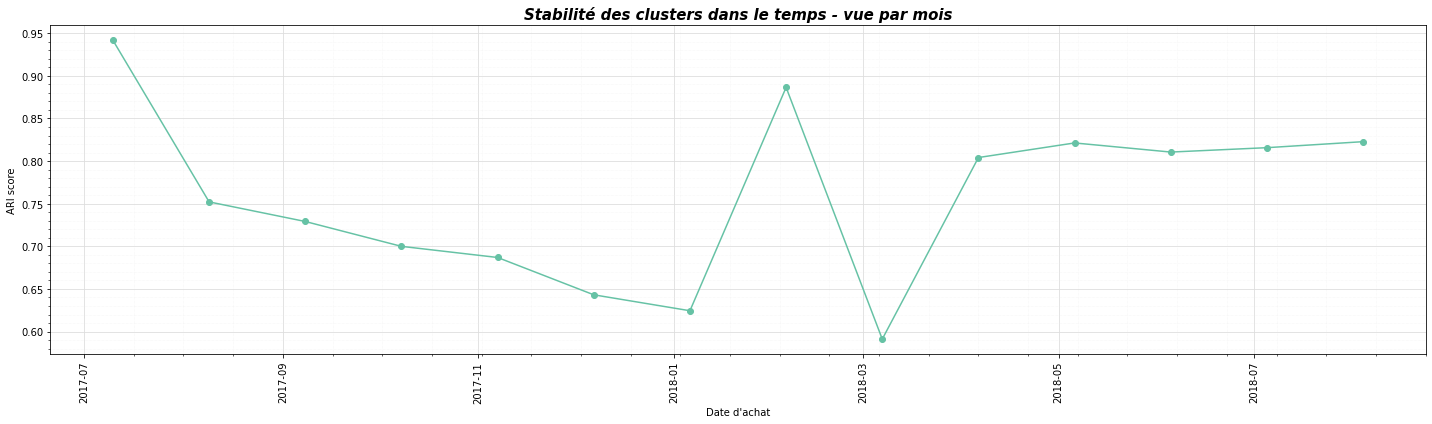

CPU times: user 2min 24s, sys: 11.1 s, total: 2min 35s
Wall time: 1min 8s


In [34]:
%%time

# Même chose en changeant d'echelle (mois)
# (comparaison t0)

# dernière date dispo = 29/08/2018
last_day = pd.to_datetime('2018-08-29')

# intervalle de temps
date_debut = pd.to_datetime('2016-10-03')
date_fin = date_debut + pd.Timedelta(days = 280)

# liste vide pour stocker ari score
ari_values = []
date_achat = []

while date_fin <= last_day:
    date_achat.append(date_fin)

    # filtrer dates et prendre 6 mois de données
    filter_date = (df_ari['Date_achat'] < date_fin) 
    df_date = df_ari[filter_date].copy()

    # 'stocker' labels des clusters (pour ensuite comparer aux labels qu'on va prédire)
    labels_true = df_date['cluster_num']

    data_cluster = df_date.drop(['Date_achat', 'cluster_num'], axis = 1)

    # kmeans
    km = KMeans(n_clusters = 3)
    km.fit(data_cluster)

    # prédire clusters
    labels_pred = km.predict(data_cluster)

    # calcul ari score
    ari = adjusted_rand_score(labels_true, labels_pred)
    ari_values.append(ari)

    # incrément d'un jour (pour la date de fin seulement)
    date_fin += timedelta(days = 30)

plt.figure(figsize = (20, 6))
plt.plot(date_achat, ari_values, marker = 'o', linestyle = '-')
plt.title('Stabilité des clusters dans le temps - vue par mois', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel("Date d'achat")
plt.ylabel('ARI score')
# afficher score sur graph
plt.xticks(rotation = 90)
#plt.ylim((0, 1)) # pour avoir une échelle 0 - 1 sur l'axe y
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## Conclusions ##########

# première inflexion -> pas assez de données pour que clustering soit robuste -> à ignorer
# seconde inflexion autour d'octobre 2017 (au bout d'un an) - confirme hypothèse de la vue par jour

# remontée finale -> ajout de clients qui recollent au clustering initial

# regarder aussi par semaine
# jouer avec taille de base clients de référence

# Changer dates -> prendre date de 'fin' de mes 6 mois et non date de début
# instabilité de survient que fin 2017 -> changement de comportements ou base devient trop grande - base de clients suffisamment représentative ? en élargissant la taille de la base client de ref, est-ce que l'instabilité arrive plus tôt ? (prendre plus que 6mois) plus la base client sera grande, plus on va se rapprocher des conditions réelles et plus ça sera intéressant
# faire quelques tests de taille de base de réference

# comment choisir seuil de rafraichissement ?
# dans la réalité, il faudrait croiser évolution du score ari avec données campagnes marketing

# voir slack

# garder les clients quand j'avance dans le temps -> un client acquis reste acquis 
# fixer base de clients (6mois) et ajouter des nouveaux clients - ne pas en enlever

In [ ]:
########## Perspectives d'amélioration / pour aller plus loin ##########

### Diagramme de Sankey
# -> voir quantité de personnes qui passent d'un cluster à un autre

### mettre à jour la base client au fur et à mesure de l'avancée dans le temps pour les clients qui font plusieurs commandes
# bien figer le random state et juste itérer dans le temps
# ne pas itérer en faisant plusieurs clustering sur le même temps

In [ ]:
# Ressources intéressantes : 

# CLTV
# https://medium.com/@abdullahorzan/data-driven-customer-segmentation-rfm-and-cltv-analysis-using-python-4238b11bd740

# marketing campaign analysis
# https://medium.com/@cakrasinaga/marketing-campaign-analysis-52747f138e93

# https://amueller.github.io/aml/04-model-evaluation/17-cluster-evaluation.html ###### meh
# https://github.com/FlorentF9/skstab ### non - module python pour évaluer stabilité des clusters mais pas dans le temps
# https://reval.readthedocs.io/en/latest/ ### meh
# https://www.kaggle.com/code/hamadizarrouk/segmentation-des-clients-d-un-site-e-commerce-nb2#Stabilit%C3%A9-temporelle-de-la-segmentation
